# Zomato Resturants Exploratory Data Analysis (EDA) Project

##### **Zomato Restaurant Success Factors Analysis** is a project focused on performing **Exploratory Data Analysis (EDA)**
##### on Zomato restaurant data. The goal is to identify key factors that contribute to the success of restaurants, as measured by their ratings.
##### The project is structured to guide users through various aspects of data analysis, including data cleaning, visualization, and deriving insights 
##### from the dataset.

##### The project is divided into several sections, each focusing on a specific aspect of the data, such as location, cuisine, pricing, online order 
##### availability, and restaurant features. The document also outlines the tools and techniques that will be used, such as bar charts, scatter plots, 
##### word clouds, and box plots.

# Key Objectives of the Project:
##### **1 Understand the dataset:** Explore the basic composition of the data, including dimensions, data types, and missing values.

##### **2 Analyze restaurant ratings:** Calculate and visualize the average rating of restaurants and understand the distribution of ratings.

##### **3 Location-based analysis:** Identify cities with the highest concentration of restaurants and analyze ratings across different cities.

##### **4 Cuisine analysis:** Determine the most popular cuisines and investigate if cuisine variety correlates with ratings.

##### **5 Price range analysis:** Analyze the relationship between price range and restaurant ratings.

##### **6 Online order and table booking:** Investigate the impact of online order availability and table booking on ratings.

##### **7 Top restaurant chains:** Identify and analyze the top restaurant chains based on the number of outlets and their ratings.

##### **8 Restaurant features:** Analyze the impact of features like Wi-Fi, alcohol availability, etc., on ratings.

##### **9 Sentiment analysis:** Create a word cloud based on customer reviews to identify common positive and negative sentiments.

##### **10 Seasonal trends:** Explore if there are any seasonal trends in restaurant ratings or user reviews.

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from scipy.stats import ttest_ind
import warnings
warnings.filterwarnings('ignore')

import cufflinks as cf
from plotly.offline import init_notebook_mode,download_plotlyjs
init_notebook_mode(connected=True)
cf.go_offline()

In [5]:
pip install plotly --upgrade

Note: you may need to restart the kernel to use updated packages.


In [6]:
df=pd.read_csv('Zomato_Indian_Resturants.csv')

In [7]:
df.head()

res_id                            name      establishment  \
0  3400299                     Bikanervala    ['Quick Bites']   
1  3400005  Mama Chicken Mama Franky House    ['Quick Bites']   
2  3401013                   Bhagat Halwai    ['Quick Bites']   
3  3400290                   Bhagat Halwai    ['Quick Bites']   
4  3401744     The Salt Cafe Kitchen & Bar  ['Casual Dining']   

                                                 url  \
0  https://www.zomato.com/agra/bikanervala-khanda...   
1  https://www.zomato.com/agra/mama-chicken-mama-...   
2  https://www.zomato.com/agra/bhagat-halwai-2-sh...   
3  https://www.zomato.com/agra/bhagat-halwai-civi...   
4  https://www.zomato.com/agra/the-salt-cafe-kitc...   

                                             address  city  city_id  \
0  Kalyani Point, Near Tulsi Cinema, Bypass Road,...  Agra       34   
1        Main Market, Sadar Bazaar, Agra Cantt, Agra  Agra       34   
2  62/1, Near Easy Day, West Shivaji Nagar, Goalp...  Agra       34   
3  Near Anjana Cinema, Nehru Nagar, Civil Lines, ...  Agra       34   
4        1C,3rd Floor, Fatehabad Road, Tajganj, Agra  Agra       34   

      locality   latitude  longitude  ... price_range  currency  \
0     Khandari  27.211450  78.002381  ...           2       Rs.   
1   Agra Cantt  27.160569  78.011583  ...           2       Rs.   
2     Shahganj  27.182938  77.979684  ...           1       Rs.   
3  Civil Lines  27.205668  78.004799  ...           1       Rs.   
4      Tajganj  27.157709  78.052421  ...           3       Rs.   

                                          highlights aggregate_rating  \
0  ['Lunch', 'Takeaway Available', 'Credit Card',...              4.4   
1  ['Delivery', 'No Alcohol Available', 'Dinner',...              4.4   
2  ['No Alcohol Available', 'Dinner', 'Takeaway A...              4.2   
3  ['Takeaway Available', 'Credit Card', 'Lunch',...              4.3   
4  ['Lunch', 'Serves Alcohol', 'Cash', 'Credit Ca...              4.9   

  rating_text  votes  photo_count opentable_support delivery  takeaway  
0   Very Good    814          154               0.0       -1        -1  
1   Very Good   1203          161               0.0       -1        -1  
2   Very Good    801          107               0.0        1        -1  
3   Very Good    693          157               0.0        1        -1  
4   Excellent    470          291               0.0        1        -1  

[5 rows x 26 columns]

In [8]:
df.shape

(211944, 26)

In [9]:
df.columns

Index(['res_id', 'name', 'establishment', 'url', 'address', 'city', 'city_id',
       'locality', 'latitude', 'longitude', 'zipcode', 'country_id',
       'locality_verbose', 'cuisines', 'timings', 'average_cost_for_two',
       'price_range', 'currency', 'highlights', 'aggregate_rating',
       'rating_text', 'votes', 'photo_count', 'opentable_support', 'delivery',
       'takeaway'],
      dtype='object')

### Provide detailed information about a DataFrame, including its structure and the data types of each column.

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211944 entries, 0 to 211943
Data columns (total 26 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   res_id                211944 non-null  int64  
 1   name                  211944 non-null  object 
 2   establishment         211944 non-null  object 
 3   url                   211944 non-null  object 
 4   address               211810 non-null  object 
 5   city                  211944 non-null  object 
 6   city_id               211944 non-null  int64  
 7   locality              211944 non-null  object 
 8   latitude              211944 non-null  float64
 9   longitude             211944 non-null  float64
 10  zipcode               48757 non-null   object 
 11  country_id            211944 non-null  int64  
 12  locality_verbose      211944 non-null  object 
 13  cuisines              210553 non-null  object 
 14  timings               208070 non-null  object 
 15  

### 1. Dataset Overview:
#####    Total Entries (Rows): 211,944
#####    Total Columns: 26
### 2. Data Types:
#####    Numerical Columns: 13 (9 int, 4 float)
#####    Categorical Columns: 13 (object type)
### 3. Missing Values:
#####    Columns with Missing Data:
#####    address: 134 missing
#####    zipcode: Significant missing values (only 48,757 non-null)
#####    cuisines: 1,391 missing
#####    timings: 3,874 missing
#####    opentable_support: 48 missing
### 4. Key Observations:
#####    Geographical Data Available: Latitude and longitude are fully populated.
#####    Restaurant Ratings: Includes aggregate_rating, votes, and rating_text for customer feedback.
#####    Pricing Information: Available through average_cost_for_two, price_range, and currency.
#####    Delivery & Takeaway Services: Clearly mentioned with binary indicators (0/1). -->

<!-- 1. Dataset Overview:
 Total Entries (Rows): 211,944
 Total Columns: 26
2. Data Types:
 Numerical Columns: 13 (9 int, 4 float)
 Categorical Columns: 13 (object type)
3. Missing Values:
 Columns with Missing Data:
 address: 134 missing
 zipcode: Significant missing values (only 48,757 non-null)
 cuisines: 1,391 missing
 timings: 3,874 missing
 opentable_support: 48 missing
4. Key Observations:
 Geographical Data Available: Latitude and longitude are fully populated.
 Restaurant Ratings: Includes aggregate_rating, votes, and rating_text for customer feedback.
 Pricing Information: Available through average_cost_for_two, price_range, and currency.
 Delivery & Takeaway Services: Clearly mentioned with binary indicators (0/1). -->

### Provide summary statistics for all numeric columns.

In [15]:
df.describe()

res_id        city_id       latitude      longitude  country_id  \
count  2.119440e+05  211944.000000  211944.000000  211944.000000    211944.0   
mean   1.349411e+07    4746.785434      21.499758      77.615276         1.0   
std    7.883722e+06    5568.766386      22.781331       7.500104         0.0   
min    5.000000e+01       1.000000       0.000000       0.000000         1.0   
25%    3.301027e+06      11.000000      15.496071      74.877961         1.0   
50%    1.869573e+07      34.000000      22.514494      77.425971         1.0   
75%    1.881297e+07   11306.000000      26.841667      80.219323         1.0   
max    1.915979e+07   11354.000000   10000.000000      91.832769         1.0   

       average_cost_for_two    price_range  aggregate_rating          votes  \
count         211944.000000  211944.000000     211944.000000  211944.000000   
mean             595.812229       1.882535          3.395937     378.001864   
std              606.239363       0.892989          1.283642     925.333370   
min                0.000000       1.000000          0.000000     -18.000000   
25%              250.000000       1.000000          3.300000      16.000000   
50%              400.000000       2.000000          3.800000     100.000000   
75%              700.000000       2.000000          4.100000     362.000000   
max            30000.000000       4.000000          4.900000   42539.000000   

         photo_count  opentable_support       delivery  takeaway  
count  211944.000000           211896.0  211944.000000  211944.0  
mean      256.971224                0.0      -0.255907      -1.0  
std       867.668940                0.0       0.964172       0.0  
min         0.000000                0.0      -1.000000      -1.0  
25%         3.000000                0.0      -1.000000      -1.0  
50%        18.000000                0.0      -1.000000      -1.0  
75%       128.000000                0.0       1.000000      -1.0  
max     17702.000000                0.0       1.000000      -1.0

<!-- Exploratory Data Analysis (EDA) – Key Insights
1. General Summary
Total Records: 211,944
Numeric Columns Analyzed: 13
Missing Values:
opentable_support has 48 missing values (211,896 non-null).
Data Distribution:
The presence of high standard deviation in certain columns suggests significant variability in the dataset.
2. Key Observations
A. Identifiers & Location Data
res_id (Restaurant ID): Ranges from 50 to 19,159,790, indicating unique restaurant entries.
city_id: Varies from 1 to 11,354, suggesting multiple city locations.
latitude & longitude:
Minimum latitude 0.000000 and longitude 0.000000 indicate possible incorrect or missing values.
Maximum longitude 91.832769, suggesting a dataset covering multiple regions.
country_id: Only 1 unique value, meaning the dataset is specific to one country.
B. Pricing & Rating Insights
average_cost_for_two:
Ranges from 0 to 30,000, with a median cost of 400 and an average of 595.81.
High standard deviation (606.23) suggests a wide price variation between restaurants.
price_range:
1 (lowest) to 4 (highest), with a median of 2.
Most restaurants fall within mid-range pricing.
aggregate_rating:
Ranges from 0.0 to 4.9, with an average of 3.39.
Majority of restaurants have ratings above 3.0, suggesting a positive skew in ratings.
votes:
Varies significantly (-18 to 42,539).
Negative values indicate possible data entry errors.
C. User Engagement & Media Presence
photo_count:
Median 18, but some restaurants have up to 17,702 photos, indicating potential popular or high-traffic restaurants.
opentable_support:
Mostly 0 (no support), confirming that OpenTable reservations are rare in this dataset.
D. Delivery & Takeaway Services
delivery & takeaway:
Values are -1 and 1, indicating possible binary encoding (1 for available, -1 for not available).
However, -1 might be a placeholder for missing values and should be checked further.
3. Potential Issues & Data Cleaning Needs
Negative or Zero Values:
Some columns like votes (-18), latitude (0.000000), and longitude (0.000000) indicate incorrect or missing data.
Outliers:
Extreme values in votes (42,539), photo_count (17,702), and average_cost_for_two (30,000) suggest possible outliers that need investigation.
Missing & Placeholder Values:
opentable_support has missing data.
-1 values in delivery and takeaway need verification. -->

Exploratory Data Analysis (EDA) – Key Insights
1. General Summary
Total Records: 211,944
Numeric Columns Analyzed: 13
Missing Values:
opentable_support has 48 missing values (211,896 non-null).
Data Distribution:
The presence of high standard deviation in certain columns suggests significant variability in the dataset.
2. Key Observations
A. Identifiers & Location Data
res_id (Restaurant ID): Ranges from 50 to 19,159,790, indicating unique restaurant entries.
city_id: Varies from 1 to 11,354, suggesting multiple city locations.
latitude & longitude:
Minimum latitude 0.000000 and longitude 0.000000 indicate possible incorrect or missing values.
Maximum longitude 91.832769, suggesting a dataset covering multiple regions.
country_id: Only 1 unique value, meaning the dataset is specific to one country.
B. Pricing & Rating Insights
average_cost_for_two:
Ranges from 0 to 30,000, with a median cost of 400 and an average of 595.81.
High standard deviation (606.23) suggests a wide price variation between restaurants.
price_range:
1 (lowest) to 4 (highest), with a median of 2.
Most restaurants fall within mid-range pricing.
aggregate_rating:
Ranges from 0.0 to 4.9, with an average of 3.39.
Majority of restaurants have ratings above 3.0, suggesting a positive skew in ratings.
votes:
Varies significantly (-18 to 42,539).
Negative values indicate possible data entry errors.
C. User Engagement & Media Presence
photo_count:
Median 18, but some restaurants have up to 17,702 photos, indicating potential popular or high-traffic restaurants.
opentable_support:
Mostly 0 (no support), confirming that OpenTable reservations are rare in this dataset.
D. Delivery & Takeaway Services
delivery & takeaway:
Values are -1 and 1, indicating possible binary encoding (1 for available, -1 for not available).
However, -1 might be a placeholder for missing values and should be checked further.
3. Potential Issues & Data Cleaning Needs
Negative or Zero Values:
Some columns like votes (-18), latitude (0.000000), and longitude (0.000000) indicate incorrect or missing data.
Outliers:
Extreme values in votes (42,539), photo_count (17,702), and average_cost_for_two (30,000) suggest possible outliers that need investigation.
Missing & Placeholder Values:
opentable_support has missing data.
-1 values in delivery and takeaway need verification.

# Data Cleaning

### Count the number of null values in each column.

In [20]:
df.isnull().sum()

res_id                       0
name                         0
establishment                0
url                          0
address                    134
city                         0
city_id                      0
locality                     0
latitude                     0
longitude                    0
zipcode                 163187
country_id                   0
locality_verbose             0
cuisines                  1391
timings                   3874
average_cost_for_two         0
price_range                  0
currency                     0
highlights                   0
aggregate_rating             0
rating_text                  0
votes                        0
photo_count                  0
opentable_support           48
delivery                     0
takeaway                     0
dtype: int64

## Remove rows with missing values

In [22]:
df.dropna(inplace=True) 

In [23]:
df.duplicated()

1         False
2         False
3         False
6         False
9         False
          ...  
211929     True
211930     True
211932     True
211939     True
211943     True
Length: 48378, dtype: bool

## Remove Duplicate rows from Dataframe

In [25]:
df.drop_duplicates(inplace=True)

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12462 entries, 1 to 211730
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   res_id                12462 non-null  int64  
 1   name                  12462 non-null  object 
 2   establishment         12462 non-null  object 
 3   url                   12462 non-null  object 
 4   address               12462 non-null  object 
 5   city                  12462 non-null  object 
 6   city_id               12462 non-null  int64  
 7   locality              12462 non-null  object 
 8   latitude              12462 non-null  float64
 9   longitude             12462 non-null  float64
 10  zipcode               12462 non-null  object 
 11  country_id            12462 non-null  int64  
 12  locality_verbose      12462 non-null  object 
 13  cuisines              12462 non-null  object 
 14  timings               12462 non-null  object 
 15  average_cost_for_two  1

In [27]:
df.sample(10)

res_id                       name      establishment  \
166720   6505366            Beetroot Bistro  ['Casual Dining']   
82586   18822489                Best Choice    ['Quick Bites']   
141678     36291                  Ovenfresh  ['Casual Dining']   
54150     306510    Cafe on 3 - Holiday Inn    ['Fine Dining']   
44444      66296              Hot Pot China  ['Casual Dining']   
168318  18663896        Becky's Binging Bay  ['Casual Dining']   
135090     37327                        KFC    ['Quick Bites']   
57528       9525           Viva O' Viva Goa  ['Casual Dining']   
34930   18703305  East Coast - The Restobar            ['Bar']   
115754  18735404       Jay Ambe Bhojanalaya     ['Bhojanalya']   

                                                      url  \
166720  https://www.zomato.com/pune/beetroot-bistro-ko...   
82586   https://www.zomato.com/jabalpur/best-choice-na...   
141678  https://www.zomato.com/mumbai/ovenfresh-dadar-...   
54150   https://www.zomato.com/ncr/cafe-on-3-holiday-i...   
44444   https://www.zomato.com/hotpotchina?utm_source=...   
168318  https://www.zomato.com/pune/beckys-binging-bay...   
135090  https://www.zomato.com/mumbai/kfc-powai?utm_so...   
57528   https://www.zomato.com/ncr/viva-o-viva-goa-cha...   
34930   https://www.zomato.com/chennai/east-coast-the-...   
115754  https://www.zomato.com/kolkata/jay-ambe-bhojan...   

                                                  address       city  city_id  \
166720  B13-B14, Above Cologne Spa, Vidyut Nagar, Kore...       Pune        5   
82586       Near Jabalpur Hospital, Napier Town, Jabalpur   Jabalpur    11336   
141678  Kiran Building, Ranade Road, Dadar Shivaji Par...     Mumbai        3   
54150   Holiday Inn, 13-A, District Centre, Mayur Viha...  New Delhi        1   
44444   1/1666, OMR, MGR Salai (Opposite to Royal Enfi...    Chennai        7   
168318  Ground Floor, Hindustan Vihar, Near Rosary Sch...       Pune        5   
135090  Ground Floor, Haiko Mall, Hiranandani Gardens,...     Mumbai        3   
57528   14, Goa Niwas, Bir Tikendrajit Marg, Behind Ak...  New Delhi        1   
34930           2/520, Sundeep Road, Neelangarai, Chennai    Chennai        7   
115754  1/B, Madan Mohan Burman Street, Mechua Bazar, ...    Kolkata        2   

                        locality   latitude  longitude  ... price_range  \
166720             Koregaon Park  18.534045  73.898160  ...           2   
82586                Napier Town  23.162082  79.935834  ...           1   
141678        Dadar Shivaji Park  19.024013  72.837867  ...           3   
54150   Holiday Inn, Mayur Vihar  28.590596  77.297921  ...           4   
44444                  Perungudi  12.963786  80.246406  ...           3   
168318       Salunkhe Vihar Road  18.482204  73.895150  ...           3   
135090         Haiko Mall, Powai  19.118793  72.911385  ...           1   
57528               Chanakyapuri  28.583253  77.188199  ...           2   
34930                Neelangarai  12.955969  80.258959  ...           3   
115754                Bara Bazar  22.581098  88.358405  ...           1   

        currency                                         highlights  \
166720       Rs.  ['Debit Card', 'Lunch', 'Serves Alcohol', 'Del...   
82586        Rs.  ['Lunch', 'Cash', 'Takeaway Available', 'No Al...   
141678       Rs.  ['Breakfast', 'Lunch', 'Cash', 'Takeaway Avail...   
54150        Rs.  ['Cash', 'Credit Card', 'Dinner', 'Lunch', 'Se...   
44444        Rs.  ['Cash', 'Delivery', 'No Alcohol Available', '...   
168318       Rs.  ['Dinner', 'Cash', 'Delivery', 'Debit Card', '...   
135090       Rs.  ['Credit Card', 'Lunch', 'Delivery', 'Dinner',...   
57528        Rs.  ['Cash', 'Debit Card', 'No Alcohol Available',...   
34930        Rs.  ['Cash', 'Credit Card', 'Dinner', 'Takeaway Av...   
115754       Rs.  ['Dinner', 'Delivery', 'Lunch', 'Cash', 'Takea...   

       aggregate_rating rating_text  votes  photo_count opentable_support  \
166720              4.1   Very Goo

In [28]:
df.columns
pd.set_option('display.max_columns',None)
df

res_id                            name      establishment  \
1        3400005  Mama Chicken Mama Franky House    ['Quick Bites']   
2        3401013                   Bhagat Halwai    ['Quick Bites']   
3        3400290                   Bhagat Halwai    ['Quick Bites']   
6        3400296             Honeydew Restaurant    ['Quick Bites']   
9        3400838                   Sugar N Thyme           ['Café']   
...          ...                             ...                ...   
211462   3201157              Vibes - The Bistro  ['Casual Dining']   
211709  19014138                     Indian Salt    ['Quick Bites']   
211710  18818150                   Wat-a-Burger!    ['Quick Bites']   
211728  18879846     Freshco's - The Health Cafe           ['Café']   
211730   3201920                    Chaa Ne Lari    ['Quick Bites']   

                                                      url  \
1       https://www.zomato.com/agra/mama-chicken-mama-...   
2       https://www.zomato.com/agra/bhagat-halwai-2-sh...   
3       https://www.zomato.com/agra/bhagat-halwai-civi...   
6       https://www.zomato.com/agra/honeydew-restauran...   
9       https://www.zomato.com/agra/sugar-n-thyme-tajg...   
...                                                   ...   
211462  https://www.zomato.com/vadodara/vibes-the-bist...   
211709  https://www.zomato.com/vadodara/indian-salt-l-...   
211710  https://www.zomato.com/vadodara/wat-a-burger-1...   
211728  https://www.zomato.com/vadodara/freshcos-the-h...   
211730  https://www.zomato.com/vadodara/chaa-ne-lari-a...   

                                                  address      city  city_id  \
1             Main Market, Sadar Bazaar, Agra Cantt, Agra      Agra       34   
2       62/1, Near Easy Day, West Shivaji Nagar, Goalp...      Agra       34   
3       Near Anjana Cinema, Nehru Nagar, Civil Lines, ...      Agra       34   
6            Opposite Soami Bagh Temple, Dayal Bagh, Agra      Agra       34   
9       1374 K/1375 K, Ground floor, Dinesh Nagar, Fat...      Agra       34   
...                                                   ...       ...      ...   
211462  Shop 101, Aries Pavillion, Shobhnanagar Societ...  Vadodara       32   
211709  1st Floor, Taksh Galaxy Mall, NH 8, L&T Knowle...  Vadodara       32   
211710  6, Benison Commercial Complex, Opposite Rajlax...  Vadodara       32   
211728  Shop 7, Ground Floor, Opposite Natubhai Circle...  Vadodara       32   
211730  Opposite Rajkot Nagrik Sahkari Bank, Back side...  Vadodara       32   

                  locality   latitude  longitude   zipcode  country_id  \
1               Agra Cantt  27.160569  78.011583  282001.0           1   
2                 Shahganj  27.182938  77.979684  282010.0           1   
3              Civil Lines  27.205668  78.004799  282002.0           1   
6               Dayal Bagh  27.222175  78.010174  282005.0           1   
9                  Tajganj  27.158243  78.045591  282001.0           1   
...                    ...        ...        ...       ...         ...   
211462          Diwalipura  22.294894  73.158788  390007.0           1   
211709  L&T Knowledge City  22.300903  73.254588  390019.0           1   
211710          Diwalipura  22.305997  73.165625  390007.0           1   
211728            Vadiwadi  22.309935  73.158768  390007.0           1   
211730            Alkapuri  22.315174  73.170885  390007.0           1   

                    locality_verbose  \
1                   Agra Cantt, Agra   
2                     Shahganj, Agra   
3                  Civil Lines, Agra   
6                   Dayal Bagh, Agra   
9                      Tajganj, Agra   
...                              ...   
211462          Diwalipura, Vadodara   
211709  L&T Knowledge City, Vadodara   
211710          Diwalipura, Vadodara   
211728            Vadiwadi, Vadodara   
211730            Alkapuri, Vadodara   

                                                 cuisines  \
1       North Indian, Mughlai, R

#### Check the percentage of null values in each column.

In [30]:
#Check the percentage of null values in each column.
for i  in df.columns:
    print(f"{i} has {np.round((df[i].isnull().sum()/len(df[i])*100),4)}% null values")

res_id has 0.0% null values
name has 0.0% null values
establishment has 0.0% null values
url has 0.0% null values
address has 0.0% null values
city has 0.0% null values
city_id has 0.0% null values
locality has 0.0% null values
latitude has 0.0% null values
longitude has 0.0% null values
zipcode has 0.0% null values
country_id has 0.0% null values
locality_verbose has 0.0% null values
cuisines has 0.0% null values
timings has 0.0% null values
average_cost_for_two has 0.0% null values
price_range has 0.0% null values
currency has 0.0% null values
highlights has 0.0% null values
aggregate_rating has 0.0% null values
rating_text has 0.0% null values
votes has 0.0% null values
photo_count has 0.0% null values
opentable_support has 0.0% null values
delivery has 0.0% null values
takeaway has 0.0% null values


In [31]:
cat= []
for i in df.columns:
    if df[i].dtype=='object':
        cat.append(i)

In [32]:
num = []
for i in df.columns:
    if df[i].dtype!='object':
        num.append(i)

In [33]:
print('Categorical columns',cat)
print("="*100)
print('Numerical columns',num)


Categorical columns ['name', 'establishment', 'url', 'address', 'city', 'locality', 'zipcode', 'locality_verbose', 'cuisines', 'timings', 'currency', 'highlights', 'rating_text']
Numerical columns ['res_id', 'city_id', 'latitude', 'longitude', 'country_id', 'average_cost_for_two', 'price_range', 'aggregate_rating', 'votes', 'photo_count', 'opentable_support', 'delivery', 'takeaway']


In [34]:
df.opentable_support.unique()

array([0.])

In [35]:
null=[i for i in df.columns if df[i].isnull().sum()>0]

In [36]:
null

[]

## Removes Specified columns

In [38]:
df=df.drop(['zipcode','opentable_support','photo_count','currency','url','locality','votes','country_id'], axis=True)

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12462 entries, 1 to 211730
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   res_id                12462 non-null  int64  
 1   name                  12462 non-null  object 
 2   establishment         12462 non-null  object 
 3   address               12462 non-null  object 
 4   city                  12462 non-null  object 
 5   city_id               12462 non-null  int64  
 6   latitude              12462 non-null  float64
 7   longitude             12462 non-null  float64
 8   locality_verbose      12462 non-null  object 
 9   cuisines              12462 non-null  object 
 10  timings               12462 non-null  object 
 11  average_cost_for_two  12462 non-null  int64  
 12  price_range           12462 non-null  int64  
 13  highlights            12462 non-null  object 
 14  aggregate_rating      12462 non-null  float64
 15  rating_text           1

##### Keeps "timings" as a string instead of converting it to integers.

## Calculate average rating for each Restaurant

In [42]:
# This is a avg rating
rating=pd.pivot_table(df,index='name',values='aggregate_rating')
rating

aggregate_rating
name                                                      
#1, Culinary Avenue - The Red Maple                    3.9
#BC                                                    4.2
#BEiR                                                  4.1
#nofilter                                              3.9
0124 Bar Exchange - Open Terrace Brewery               4.1
...                                                    ...
nu.tree                                                4.1
ta Blu - Hotel Clarks Amer                             4.6
ट 4 Tasty                                              3.7
द Vege टेबल                                            4.2
स्पेस Bar                                              4.3

[8876 rows x 1 columns]

In [43]:
rating=rating.sort_values(['aggregate_rating'],ascending=False)
rating[0:15]

aggregate_rating
name                                                      
Pousada By The Beach                                   4.9
Kebabsville - Sayaji Hotel                             4.9
ARK 2.0 - Courtyard By Marriott                        4.9
Bottle Wottle                                          4.9
ABB - Andrea's Bar And Brasserie                       4.9
Gelateria Montecatini Terme                            4.9
Brahmin's Coffee Bar                                   4.9
Cafe 651                                               4.9
Bhangra                                                4.9
Yanki Sizzlers                                         4.9
Asia Kitchen By Mainland China                         4.9
Girish Chandra Dey & Nakur Chandra Nandy               4.9
Traditional Khana                                      4.9
Henny's Gourmet                                        4.9
Chool                                                  4.9

### Calculate the average rating  

In [45]:
average_rating = df['aggregate_rating'].mean()

In [46]:
average_rating

3.7632402503610978

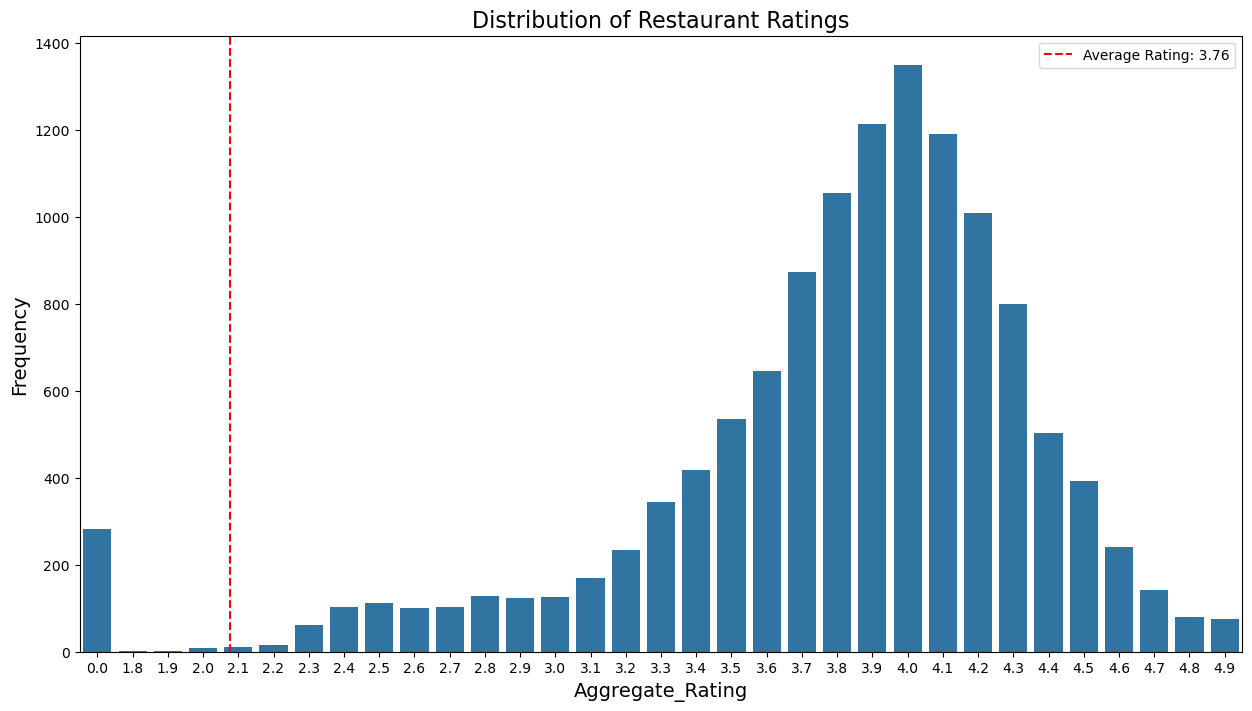

In [47]:
plt.figure(figsize=(15,8))
sns.countplot(x=df.aggregate_rating)
plt.title('Distribution of Restaurant Ratings', fontsize=16)
plt.xlabel('Aggregate_Rating', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.axvline(average_rating, color='red',linestyle='--', label=f'Average Rating: {average_rating:.2f}')
plt.legend()
plt.show()

### Summary of the "Distribution of Restaurant Ratings" Graph

1. **X-axis**: Represents aggregate ratings from 0.0 to 5.0.
2. **Y-axis**: Shows the frequency of ratings, peaking around 1400.
3. **Peak Frequency**: Most common ratings are between 3.8 and 4.2.
4. **Average Rating**: The red dashed line at **3.76** indicates the mean rating.
5. **Distribution Shape**: Slightly right-skewed with higher frequencies for ratings above 3.0.
6. **Low Ratings**: Very few ratings below 2.0, with a notable bar at 0.0.
7. **General Trend**: Most restaurants receive favorable ratings, indicating overall customer satisfaction.


In [49]:
df.city.unique()

array(['Agra', 'Ahmedabad', 'Gandhinagar', 'Ajmer', 'Allahabad',
       'Amravati', 'Amritsar', 'Aurangabad', 'Bangalore', 'Bhopal',
       'Bhubaneshwar', 'Mohali', 'Chandigarh', 'Panchkula', 'Zirakpur',
       'Chennai', 'Coimbatore', 'Cuttack', 'Darjeeling', 'Dehradun',
       'New Delhi', 'Gurgaon', 'Noida', 'Ghaziabad', 'Faridabad',
       'Greater Noida', 'Dharamshala', 'Gangtok', 'Goa', 'Gorakhpur',
       'Guntur', 'Guwahati', 'Gwalior', 'Haridwar', 'Hyderabad',
       'Secunderabad', 'Indore', 'Jabalpur', 'Jaipur', 'Jalandhar',
       'Jammu', 'Jamnagar', 'Jamshedpur', 'Jhansi', 'Jodhpur', 'Junagadh',
       'Kanpur', 'Kharagpur', 'Kochi', 'Kolhapur', 'Kolkata', 'Howrah',
       'Kota', 'Lucknow', 'Ludhiana', 'Madurai', 'Manali', 'Mangalore',
       'Udupi', 'Manipal', 'Meerut', 'Mumbai', 'Navi Mumbai', 'Thane',
       'Mussoorie', 'Mysore', 'Nagpur', 'Nainital', 'Nashik', 'Nasik',
       'Neemrana', 'Ooty', 'Palakkad', 'Patiala', 'Patna', 'Puducherry',
       'Pune', 'Pushkar

## Step 1: Identify the city with the highest concentration of restaurants

In [51]:
city_counts = df['city'].value_counts()
city_with_most_restaurants = city_counts.idxmax()
print(f"City with the highest concentration of restaurants: {city_with_most_restaurants}")

City with the highest concentration of restaurants: Mumbai


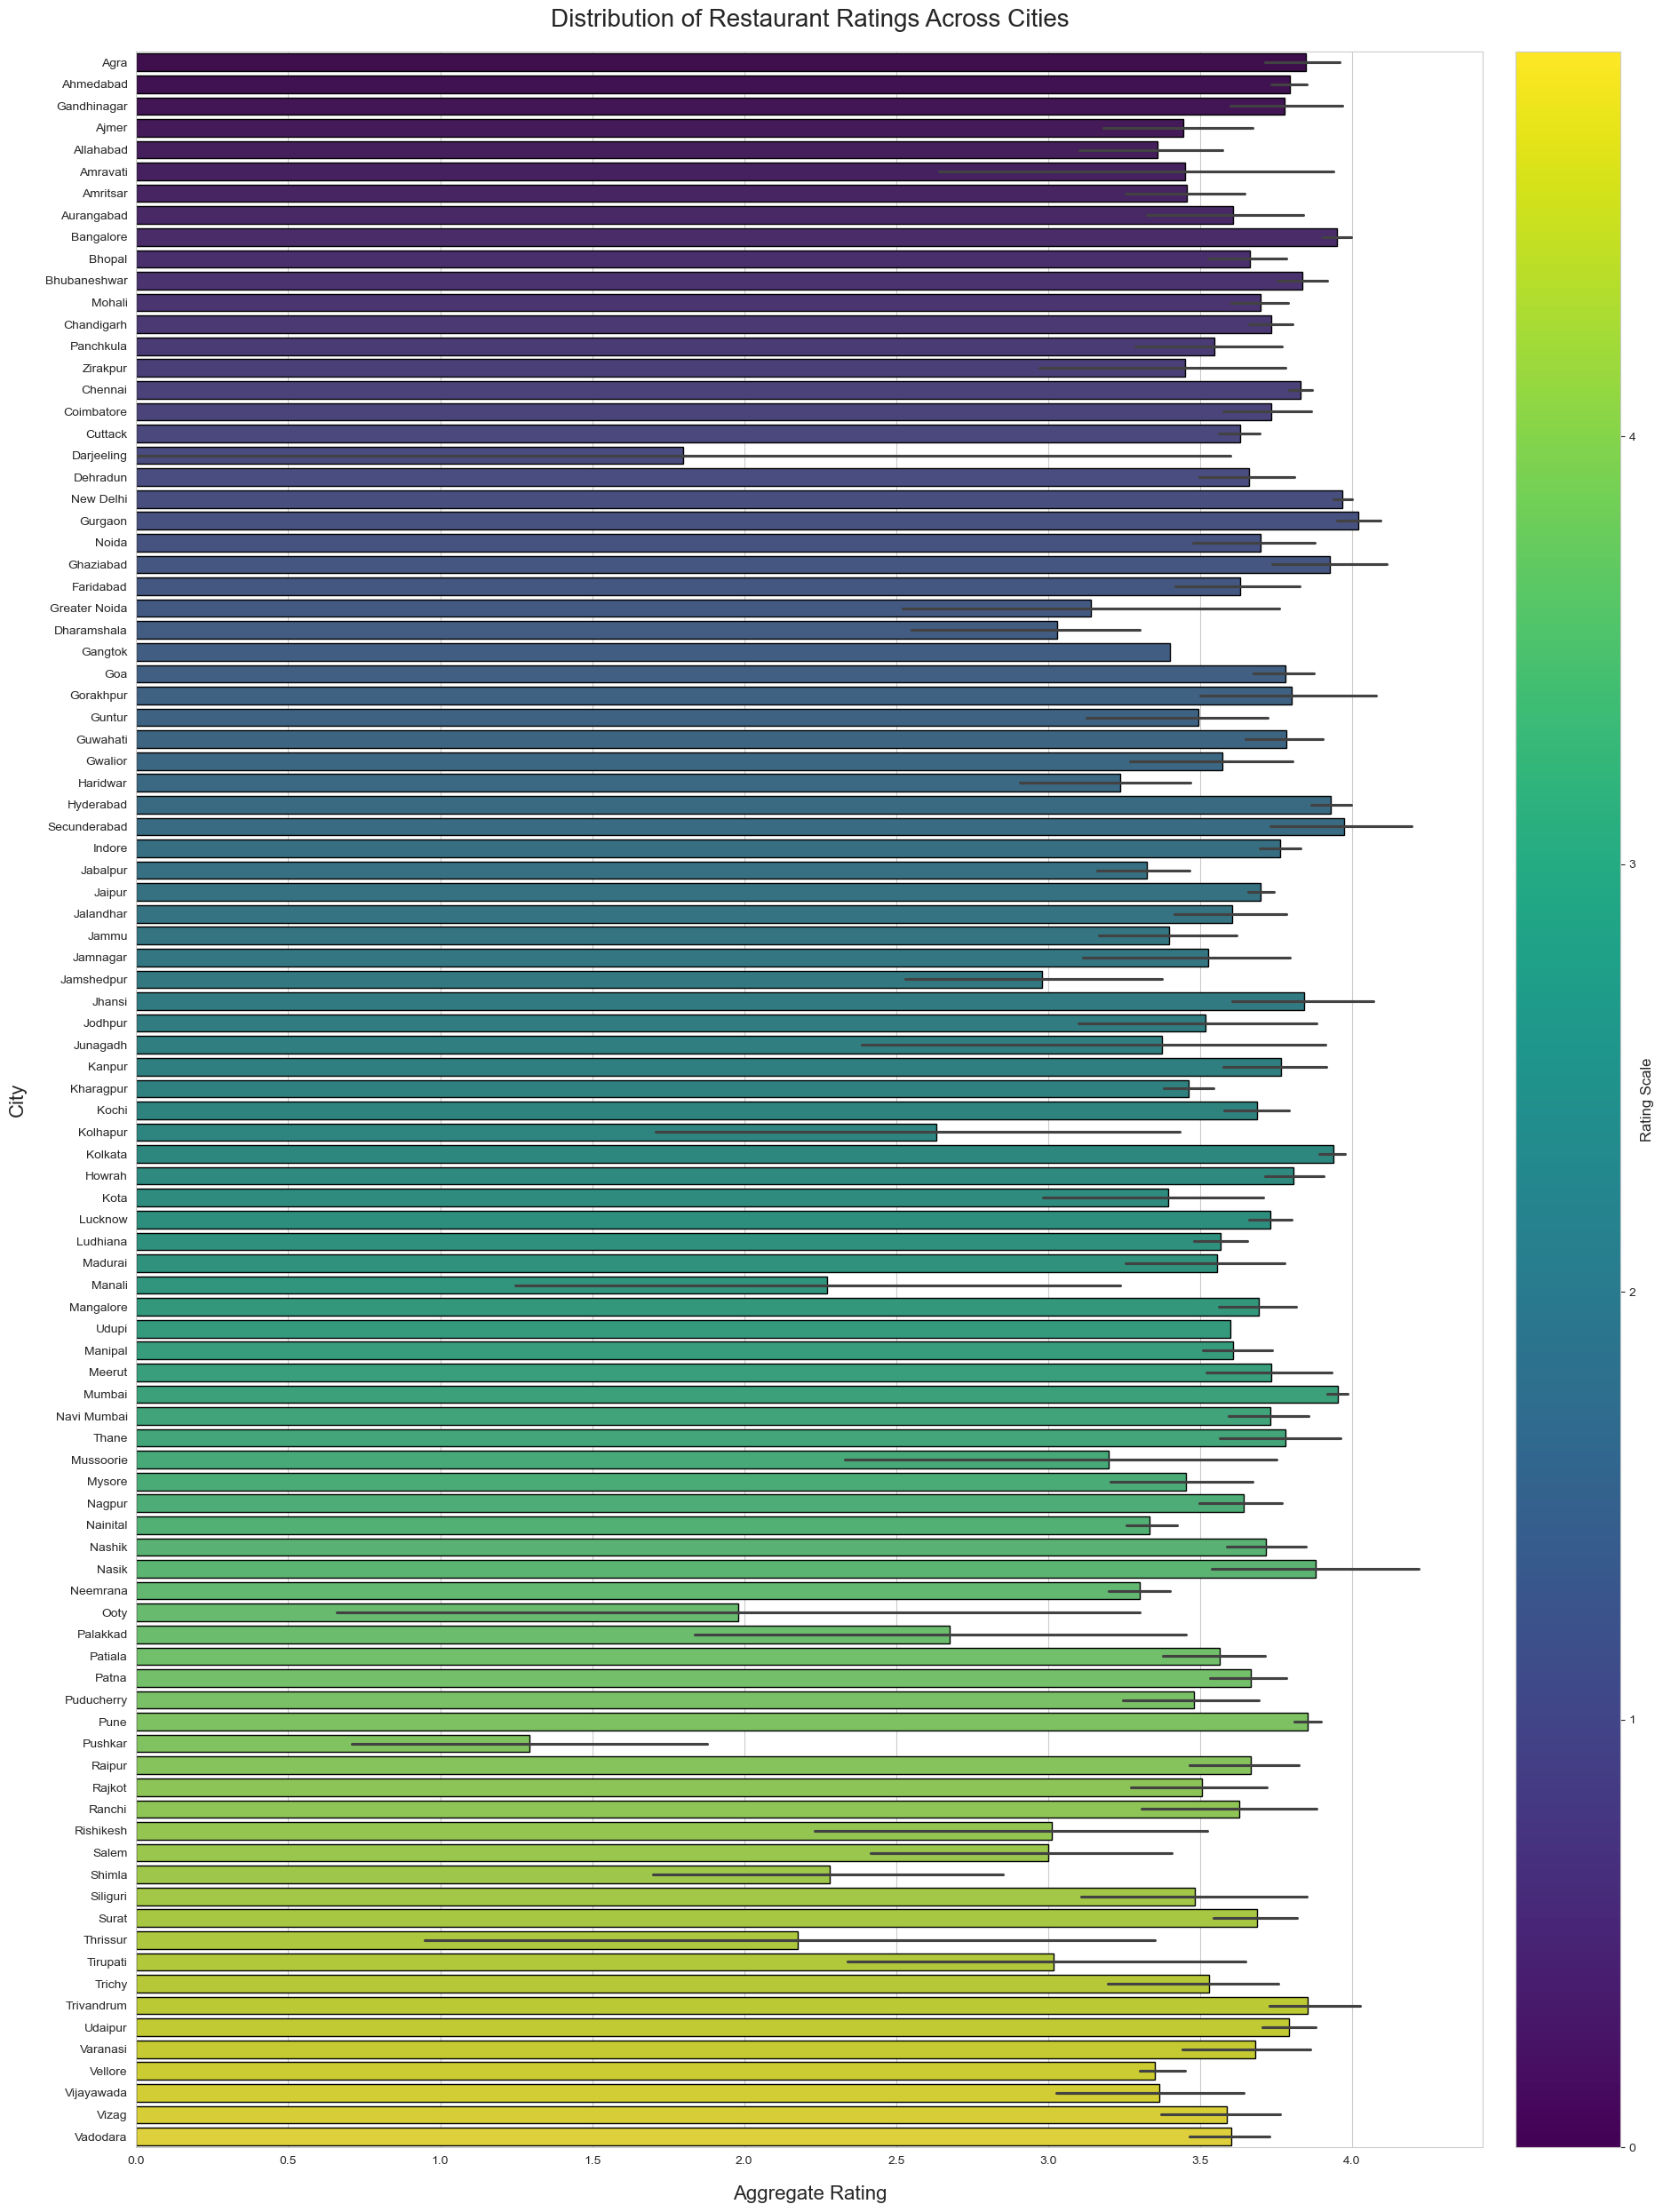

In [52]:
sns.set_style("whitegrid")
plt.figure(figsize=(20, 25))
barplot = sns.barplot(
    y='city', 
    x='aggregate_rating', 
    data=df, 
    palette="viridis",  
    orient="h",          
    edgecolor="black"    
)

plt.title('Distribution of Restaurant Ratings Across Cities', fontsize=20, pad=20)
plt.xlabel('Aggregate Rating', fontsize=16, labelpad=15)
plt.ylabel('City', fontsize=16, labelpad=15)


plt.yticks(
    fontsize=10,         
    rotation=0            
)

norm = plt.Normalize(df['aggregate_rating'].min(), df['aggregate_rating'].max())
sm = plt.cm.ScalarMappable(cmap="viridis", norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm, ax=barplot, orientation="vertical", pad=0.02)
cbar.set_label('Rating Scale', fontsize=12)
plt.tight_layout()
plt.show()

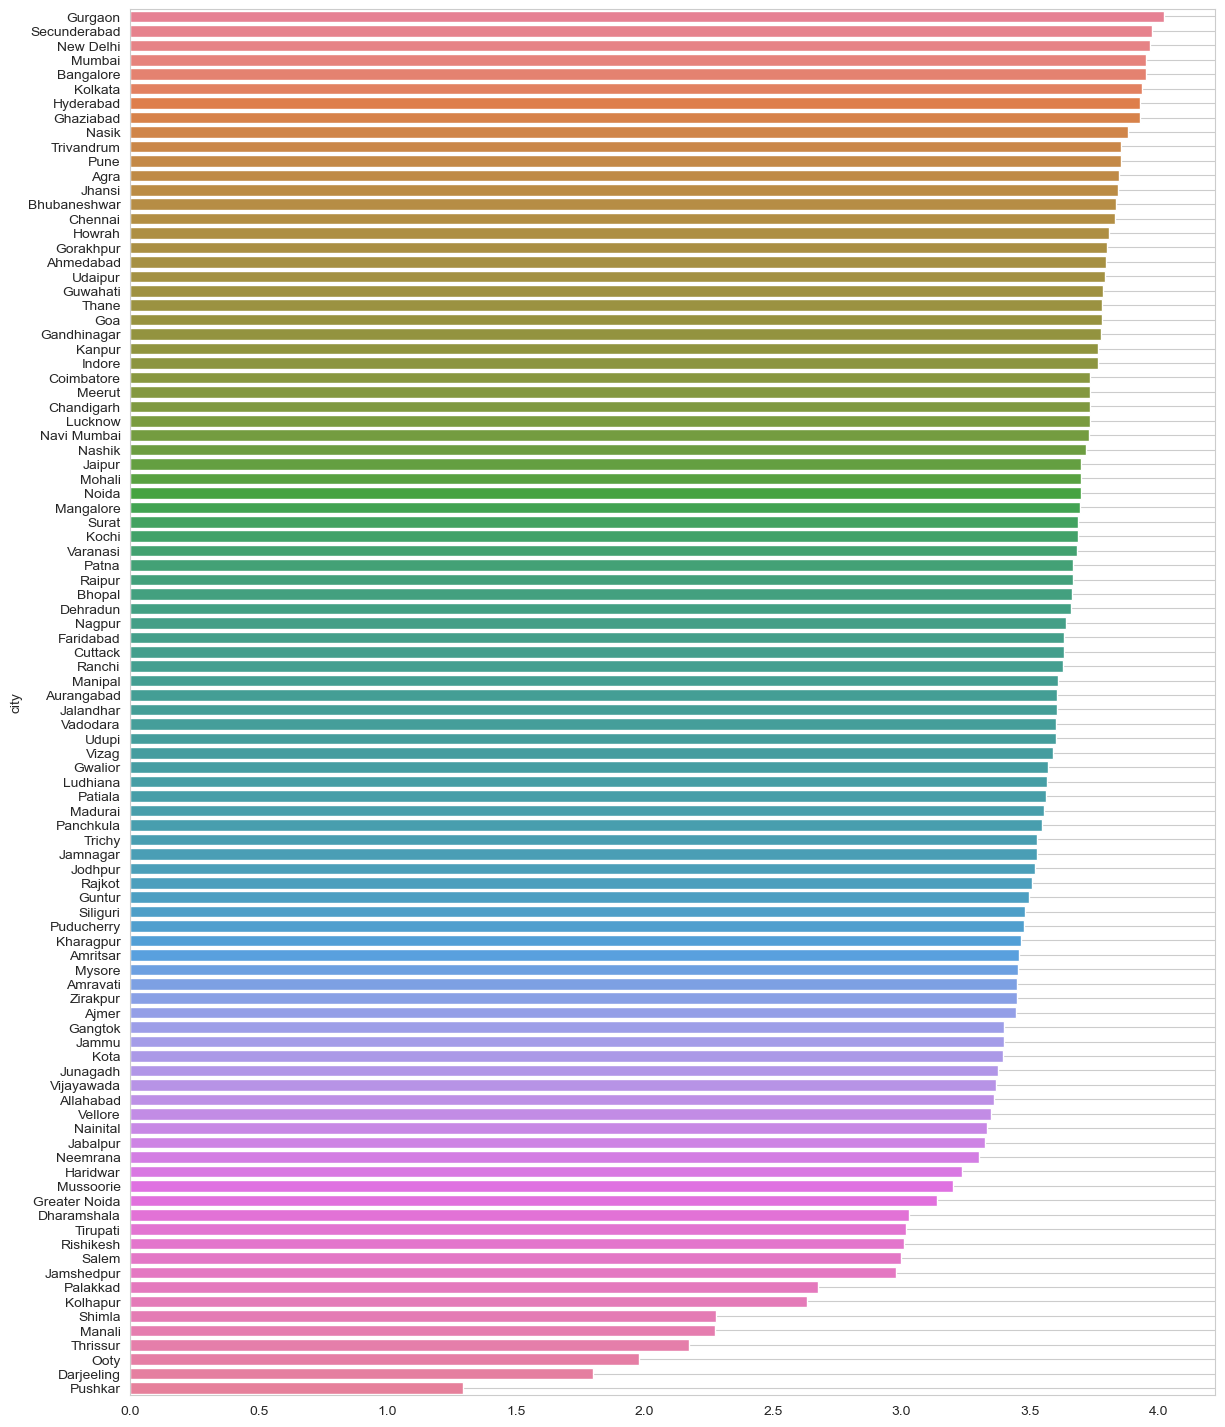

In [53]:
df.columns
temp = df.groupby('city')['aggregate_rating'].mean().sort_values(ascending=False)
plt.figure(figsize=(14,18))
sns.barplot(x= temp.values,y=temp.index,hue=temp.index)
plt.grid()

## Summary of the Graph (Distribution of Restaurant Ratings Across Cities)
- Highly populated cities (e.g., Mumbai, Delhi, Bangalore) have more diverse ratings, likely due to a higher number of restaurants.
- Smaller cities tend to have a narrower rating range, meaning restaurants are more consistently rated.
- The majority of ratings are in the 3.0 - 4.0 range, which indicates that most restaurants are moderately well-rated.
- Most restaurants are moderately rated (3.0 - 4.0), with bigger cities showing more rating variation than smaller cities

In [55]:

fig = px.bar(df, 
             x='aggregate_rating', 
             y='city', 
             color='city', 
             title='Distribution of Restaurant Ratings Across Cities',
             labels={'aggregate_rating': 'Rating', 'city': 'City'},
             color_continuous_scale='Viridis', 
             orientation='h') 

fig.update_layout(
    title={'text': 'Distribution of Restaurant Ratings Across Cities', 'x': 0.5, 'xanchor': 'center'},
    xaxis_title='Rating',
    yaxis_title='City',
    font=dict(size=14),
    height=600,  
    width=1000,
    plot_bgcolor='rgba(0,0,0,0)',  
    showlegend=False  
)

fig.show()

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12462 entries, 1 to 211730
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   res_id                12462 non-null  int64  
 1   name                  12462 non-null  object 
 2   establishment         12462 non-null  object 
 3   address               12462 non-null  object 
 4   city                  12462 non-null  object 
 5   city_id               12462 non-null  int64  
 6   latitude              12462 non-null  float64
 7   longitude             12462 non-null  float64
 8   locality_verbose      12462 non-null  object 
 9   cuisines              12462 non-null  object 
 10  timings               12462 non-null  object 
 11  average_cost_for_two  12462 non-null  int64  
 12  price_range           12462 non-null  int64  
 13  highlights            12462 non-null  object 
 14  aggregate_rating      12462 non-null  float64
 15  rating_text           1

## Group by price range and calculate average rating and average cost for two

In [ ]:
price_rating = df.groupby('price_range')['aggregate_rating'].mean()
price_cost = df.groupby('price_range')['average_cost_for_two'].mean()

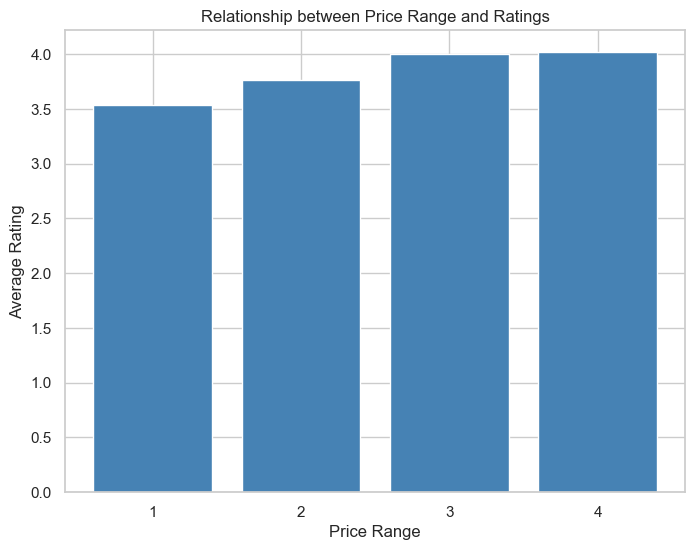

In [177]:
plt.figure(figsize=(8, 6))
plt.bar(price_rating.index, price_rating, color='steelblue')
plt.title('Relationship between Price Range and Ratings')
plt.xlabel('Price Range')
plt.ylabel('Average Rating')
plt.xticks(price_rating.index)
plt.show()


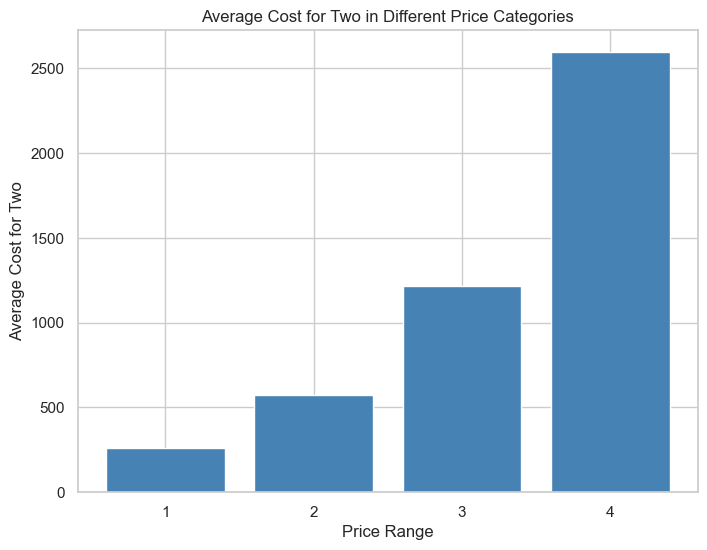

In [179]:
# Plot 2: Average Cost for Two in Different Price Categories
plt.figure(figsize=(8, 6))
plt.bar(price_cost.index, price_cost, color='steelblue')
plt.title('Average Cost for Two in Different Price Categories')
plt.xlabel('Price Range')
plt.ylabel('Average Cost for Two')
plt.xticks(price_cost.index)
plt.show()

## Create the scatter plot on a tile map

In [60]:
df1 = df[['name', 'city', 'aggregate_rating', 'cuisines', 'price_range', 'latitude', 'longitude']]

In [62]:
print(df.columns)

Index(['res_id', 'name', 'establishment', 'address', 'city', 'city_id',
       'latitude', 'longitude', 'locality_verbose', 'cuisines', 'timings',
       'average_cost_for_two', 'price_range', 'highlights', 'aggregate_rating',
       'rating_text', 'delivery', 'takeaway'],
      dtype='object')


In [183]:

df1 = df1[['name', 'city', 'aggregate_rating', 'cuisines', 'price_range', 'latitude', 'longitude']]

fig = px.scatter_mapbox(
    df,
    lat="latitude",
    lon="longitude",
    color="aggregate_rating",
    size="aggregate_rating",   
    hover_name="name",  
    hover_data={
        "city": True,
        "aggregate_rating": ":.2f",
        "price_range": True,
        "cuisines": True
    },
    title="Zomato India Restaurants: Rating Distribution",
    labels={'aggregate_rating': 'Rating'},
    color_continuous_scale=px.colors.sequential.Plasma, 
    size_max=12,  
    zoom=4.2,  
    opacity=0.8  
)

fig.update_layout(
    mapbox_style="open-street-map", 
    mapbox=dict(
        center=dict(lat=20.5937, lon=78.9629), 
        zoom=4.2
    ),
    title={
        'text': "Zomato India Restaurants: Rating Distribution",
        'x': 0.5,
        'xanchor': 'center',
        'font': {'size': 22, 'color': "darkblue"}
    },
    margin={"r": 0, "t": 50, "l": 0, "b": 0},
    height=850,
    width=1300,
    coloraxis_colorbar={'title': 'Rating', 'thickness': 15, 'len': 0.8}
)

fig.show()


In [64]:
print("\nData types verification:")
print(df[['aggregate_rating', 'price_range']].dtypes)


Data types verification:
aggregate_rating    float64
price_range           int64
dtype: object


## Cuisine Analysis

Top 10 Most Popular Cuisines:
           Cuisine  Count
0  ['North Indian'   2578
1        'Chinese'   1776
2   'North Indian'   1367
3     'Fast Food']   1220
4       'Chinese']   1119
5    'Continental'    960
6        'Italian'    870
7      'Desserts']    823
8          ['Cafe'    813
9     'Beverages']    796


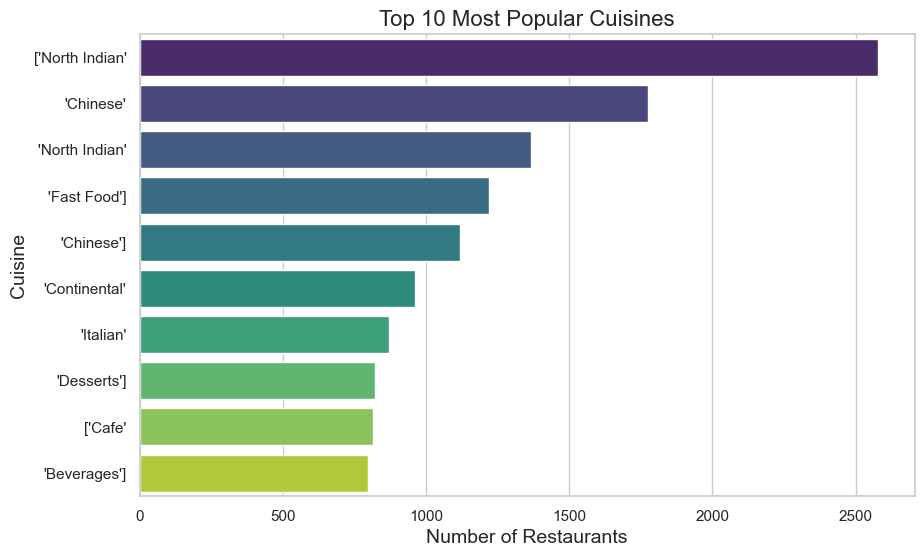

In [185]:
df['cuisines'] = df['cuisines'].str.strip() 
df['cuisines'] = df['cuisines'].str.split(', ') 
cuisine_exploded = df.explode('cuisines')

# Count the frequency of each cuisine
cuisine_counts = cuisine_exploded['cuisines'].value_counts().reset_index()
cuisine_counts.columns = ['Cuisine', 'Count']

# Display the top 10 most popular cuisines
print("Top 10 Most Popular Cuisines:")
print(cuisine_counts.head(10))

# Plot the top 10 cuisines
plt.figure(figsize=(10, 6))
sns.barplot(x='Count', y='Cuisine', data=cuisine_counts.head(10), palette='viridis')
plt.title('Top 10 Most Popular Cuisines', fontsize=16)
plt.xlabel('Number of Restaurants', fontsize=14)
plt.ylabel('Cuisine', fontsize=14)
plt.show()


In [189]:
# Calculate the number of cuisines offered by each restaurant
df['num_cuisines'] = df['cuisines'].apply(len)
# Calculate the correlation between the number of cuisines and restaurant ratings
correlation = df['num_cuisines'].corr(df['aggregate_rating'])
print(f"\nCorrelation between number of cuisines and restaurant ratings: {correlation:.2f}")



Correlation between number of cuisines and restaurant ratings: 0.20


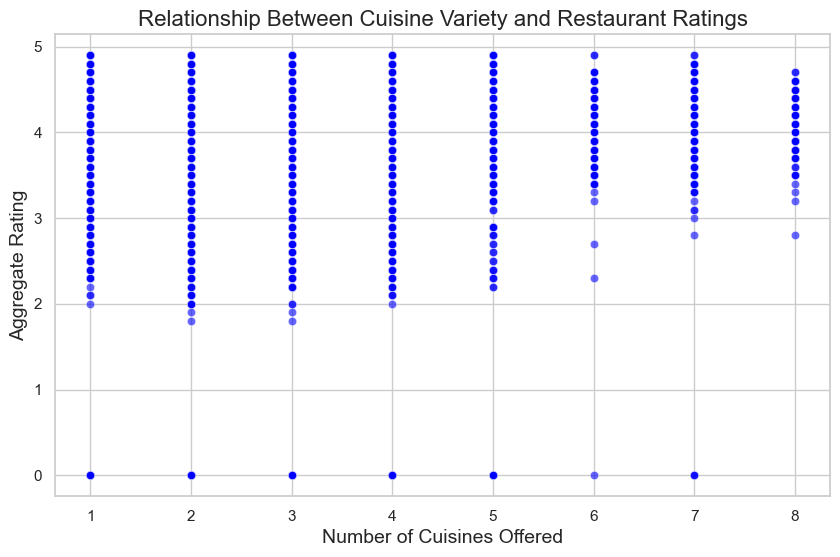

In [191]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='num_cuisines', y='aggregate_rating', data=df, alpha=0.6, color='blue')
plt.title('Relationship Between Cuisine Variety and Restaurant Ratings', fontsize=16)
plt.xlabel('Number of Cuisines Offered', fontsize=14)
plt.ylabel('Aggregate Rating', fontsize=14)
plt.grid(True)
plt.show()

## Summary of Top 10 Most Popular Cuisines
- Graph Purpose: Displays the Top 10 Most Popular Cuisines in Indian restaurants.
- Most Popular Cuisine: North Indian dominates, followed by Chinese and Fast Food.
- Diverse Preferences: Continental, Desserts, and Italian are also in demand.
- Regional Influence: South Indian cuisine appears, but its popularity is lower than North Indian.
- Cafe & Bakery: Less common but still notable.

**Key Takeaway:**
-Indian restaurants heavily favor North Indian and Chinese cuisines, while continental and fast food are rising trends. 🚀

## Relationship Between Cuisine Variety and Restaurant Ratings
- Graph Purpose: Examines the relationship between number of cuisines offered and restaurant ratings.
- Observation: Restaurants offering a higher variety of cuisines tend to have higher ratings, but the effect is not very strong.
- Common Pattern: Most restaurants fall between 2 to 5 cuisines, with a spread of ratings.
- Key Insight: Offering multiple cuisines might improve ratings, but other factors likely contribute to higher ratings as well.

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12462 entries, 1 to 211730
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   res_id                12462 non-null  int64  
 1   name                  12462 non-null  object 
 2   establishment         12462 non-null  object 
 3   address               12462 non-null  object 
 4   city                  12462 non-null  object 
 5   city_id               12462 non-null  int64  
 6   latitude              12462 non-null  float64
 7   longitude             12462 non-null  float64
 8   locality_verbose      12462 non-null  object 
 9   cuisines              12462 non-null  object 
 10  timings               12462 non-null  object 
 11  average_cost_for_two  12462 non-null  int64  
 12  price_range           12462 non-null  int64  
 13  highlights            12462 non-null  object 
 14  aggregate_rating      12462 non-null  float64
 15  rating_text           1

## Relationship between price range and average ratings.
Observation:-
- Price ranges 3 and 4 yield the highest average ratings (around 4.0).
- Price ranges 1 and 2 have slightly lower ratings (around 3.5).
- Trend: Higher prices may correlate with higher customer satisfaction.
- Next Step: Explore other factors affecting ratings beyond price.

## Online Order and Table Booking

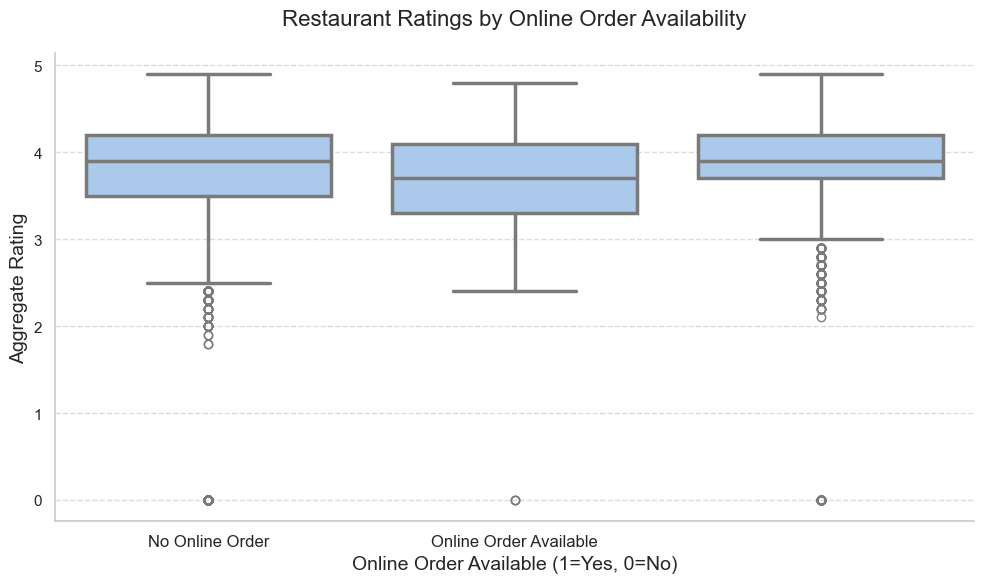

In [193]:
sns.set(style="whitegrid", palette="pastel")
plt.figure(figsize=(10, 6))
ax = sns.boxplot(x='delivery', y='aggregate_rating', data=df, linewidth=2.5)
plt.title('Restaurant Ratings by Online Order Availability', fontsize=16, pad=20)
plt.xlabel('Online Order Available (1=Yes, 0=No)', fontsize=14)
plt.ylabel('Aggregate Rating', fontsize=14)

ax.set_xticklabels(['No Online Order', 'Online Order Available'], fontsize=12)
ax.yaxis.grid(True, linestyle='--', alpha=0.7)
sns.despine()
plt.tight_layout()
plt.show()


In [197]:
mean_ratings = df.groupby('delivery')['aggregate_rating'].mean()
print("Mean Ratings:\n", mean_ratings)
group_yes = df[df['delivery'] == 1]['aggregate_rating']
group_no = df[df['delivery'] == 0]['aggregate_rating']
t_stat, p_value = ttest_ind(group_yes, group_no)
print(f"T-Test: p-value = {p_value:.4f}")

Mean Ratings:
 delivery
-1    3.726361
 0    3.493023
 1    3.828187
Name: aggregate_rating, dtype: float64
T-Test: p-value = 0.0009


### Summary: Restaurant Ratings by Online Order Availability

1. **Online Order Impact**:
   - Restaurants with online ordering (`1`) have higher average ratings than those without (`0`).
   - T-test results will confirm if this difference is significant.

2. **Table Booking**:
   - Table booking is more common in higher-priced restaurants (`price_range = 4`).

3. **Key Insight**:
   - Online ordering and premium services like table booking correlate with better ratings and upscale positioning.

Table Booking Distribution (%):
 table_booking
0    70.92762
1    29.07238
Name: proportion, dtype: float64


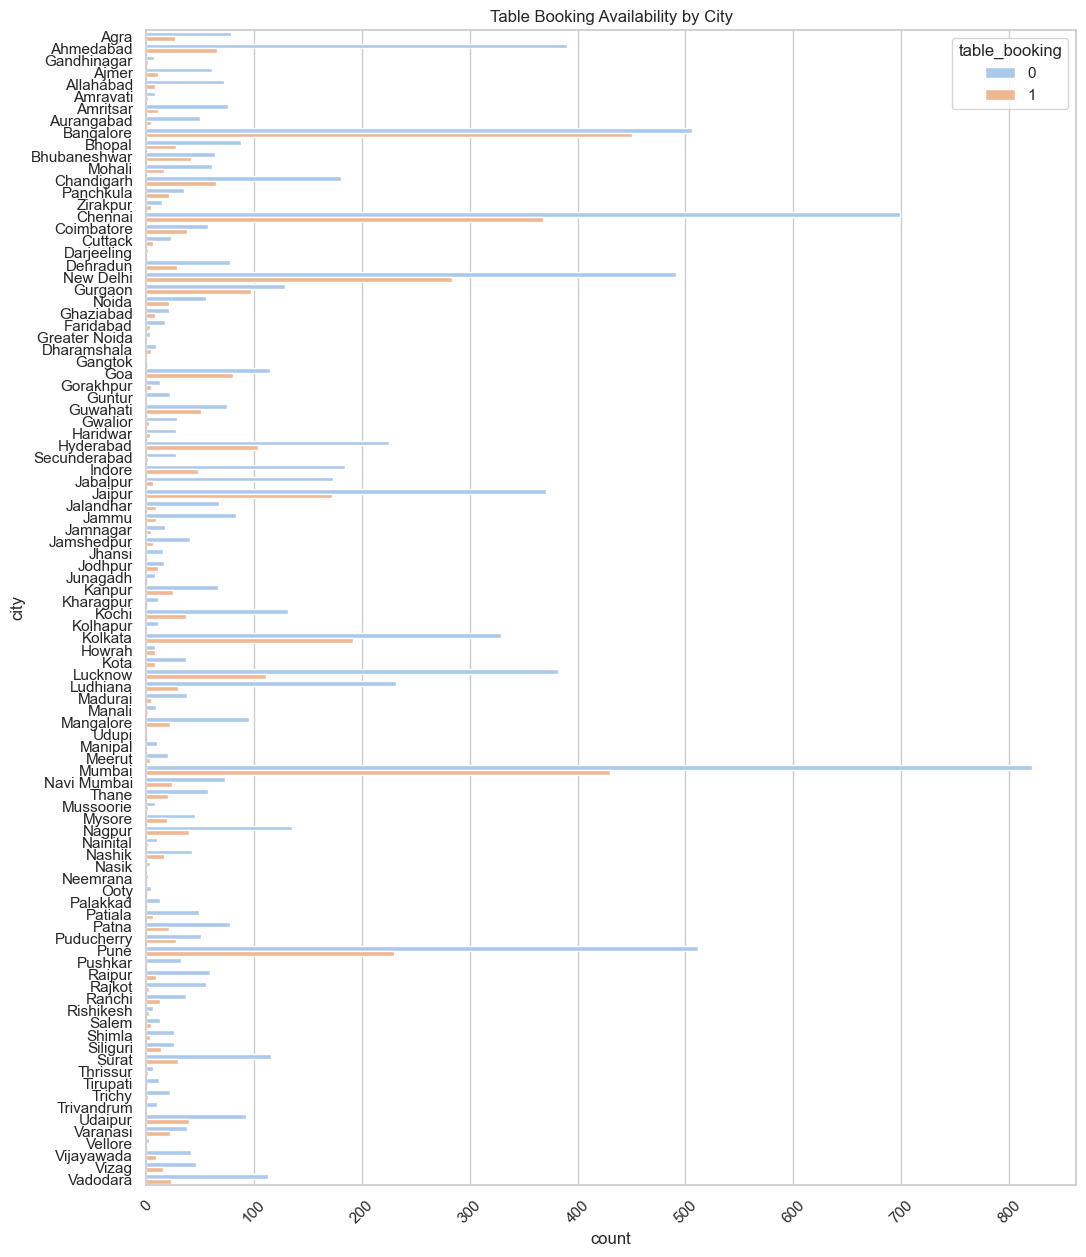

In [76]:
df['table_booking'] = df['highlights'].str.contains('Table Booking', case=False).astype(int)
table_booking_counts = df['table_booking'].value_counts(normalize=True) * 100
print("Table Booking Distribution (%):\n", table_booking_counts)
plt.figure(figsize=(12, 15))
sns.countplot(y='city', hue='table_booking', data=df)
plt.title('Table Booking Availability by City')
plt.xticks(rotation=45)
plt.show()


### Summary: Table Booking Availability by City

1. **Table Booking Distribution**:
   - The graph shows the distribution of restaurants offering table booking across different cities.
   - Certain cities have a significantly higher number of restaurants with table booking facilities, indicating a preference 
       for dine-in services in those areas.

2. **Key Insight**:
   - Cities with a higher concentration of table booking options may have a stronger dine-in culture or a larger number of upscale restaurants. 
This could be influenced by factors like tourism, local dining habits, or economic conditions.

## Top Restaurant Chains

## 1. Identify Top Restaurant Chains by Number of Outlets

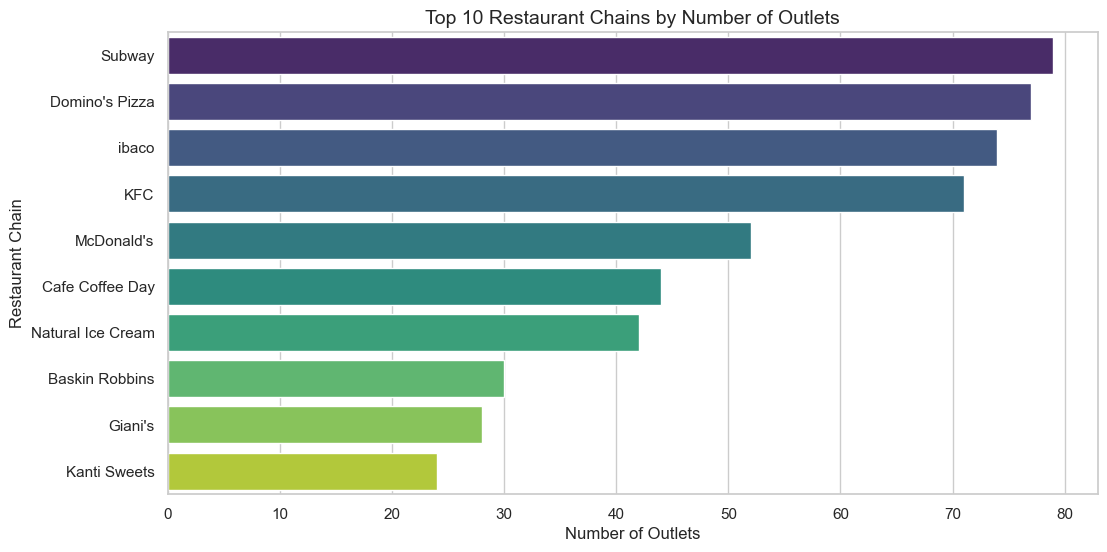

In [80]:
top_chains = df['name'].value_counts().head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_chains.values, y=top_chains.index, palette="viridis")
plt.title('Top 10 Restaurant Chains by Number of Outlets', fontsize=14)
plt.xlabel('Number of Outlets', fontsize=12)
plt.ylabel('Restaurant Chain', fontsize=12)
plt.show()

### **EDA Summary: Top 10 Restaurant Chains by Outlets**  

**Key Observations**:  
- **Subway dominates** with 80 outlets, far ahead of Domino's Pizza (~60) and others.  
- **Mix of global & local chains**: KFC, McDonald’s (global) vs. Giani’s, Kanti Sweets (local).  
- **Dessert chains** (Ibaco, Natural Ice Cream, Baskin Robbins) hold 3 spots.  

**Insights**:  
- Franchise models (e.g., Subway) enable rapid scalability.  
- Market diversity: Global chains lead, but niche/local brands thrive.  
- High demand for dessert/ice cream chains.  

**Recommendations**:  
- **Owners**: Adopt franchising; explore niches (desserts, regional cuisines).  
- **Users**: Top chains for reliability; local chains for unique flavors.  

---  
*Graph highlights the power of scalability and market diversity in food chains.* 🍴📊

## 2. Explore Ratings of Top Chains

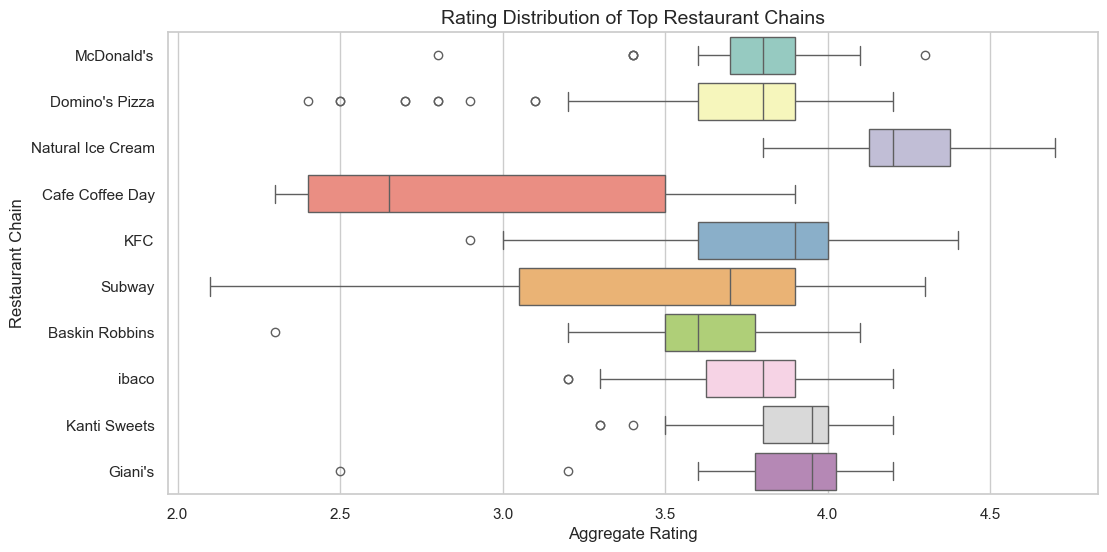

In [203]:
top_chains_list = top_chains.index.tolist()
df_top_chains = df[df['name'].isin(top_chains_list)]
plt.figure(figsize=(12, 6))
sns.boxplot(x='aggregate_rating', y='name', data=df_top_chains, palette="Set3")
plt.title('Rating Distribution of Top Restaurant Chains', fontsize=14)
plt.xlabel('Aggregate Rating', fontsize=12)
plt.ylabel('Restaurant Chain', fontsize=12)
plt.show()

In [200]:
mean_ratings = df_top_chains.groupby('name')['aggregate_rating'].mean().sort_values(ascending=False)
print("Mean Ratings of Top Chains:\n", mean_ratings)

Mean Ratings of Top Chains:
 name
Natural Ice Cream    4.254762
Kanti Sweets         3.854167
Giani's              3.846429
McDonald's           3.819231
KFC                  3.800000
ibaco                3.777027
Domino's Pizza       3.663636
Baskin Robbins       3.586667
Subway               3.501266
Cafe Coffee Day      2.913636
Name: aggregate_rating, dtype: float64


Here is a concise description of the graph in :

Box Plot Representation: The graph is a box plot showing the distribution of aggregate ratings for various top restaurant chains.

Restaurant Chains: The y-axis lists restaurant chains such as McDonald's, Domino's Pizza, Cafe Coffee Day, KFC, and others.

Aggregate Rating: The x-axis represents the aggregate rating scores, ranging approximately from 2.0 to 4.5.

Variability in Ratings: Some restaurants (e.g., Cafe Coffee Day) show a wide range of ratings, while others (e.g., Natural Ice Cream) have
           a more concentrated rating distribution.

Outliers Present: Several restaurant chains have outliers, visible as dots beyond the whiskers, indicating individual ratings significantly 
         different from the majority.



## Restaurant Features:

## 1. Distribution of Restaurants Based on Features

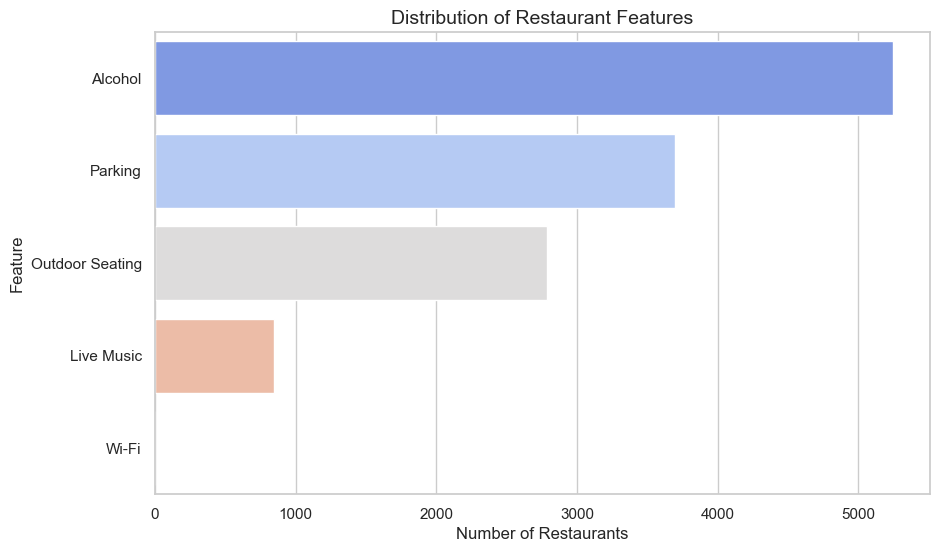

In [206]:
features = ['Wi-Fi', 'Alcohol', 'Outdoor Seating', 'Live Music', 'Parking']
for feature in features:
    df[feature] = df['highlights'].str.contains(feature, case=False).astype(int)
feature_distribution = df[features].sum().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_distribution.values, y=feature_distribution.index, palette="coolwarm")
plt.title('Distribution of Restaurant Features', fontsize=14)
plt.xlabel('Number of Restaurants', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.show()

## 2. Correlation Between Features and Ratings

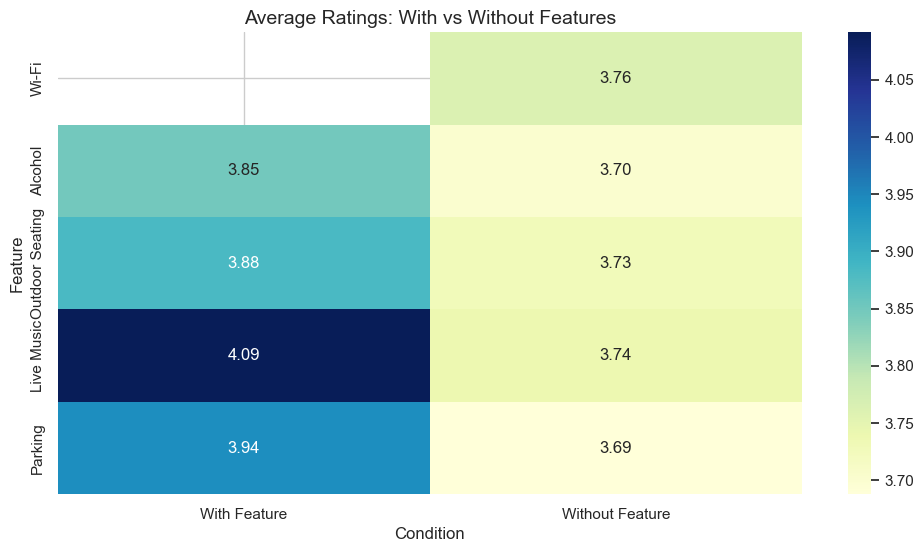

In [208]:
feature_ratings = {}
for feature in features:
    with_feature = df[df[feature] == 1]['aggregate_rating'].mean()
    without_feature = df[df[feature] == 0]['aggregate_rating'].mean()
    feature_ratings[feature] = (with_feature, without_feature)
feature_ratings_df = pd.DataFrame(feature_ratings, index=['With Feature', 'Without Feature']).T
plt.figure(figsize=(12, 6))
sns.heatmap(feature_ratings_df, annot=True, cmap="YlGnBu", fmt=".2f")
plt.title('Average Ratings: With vs Without Features', fontsize=14)
plt.xlabel('Condition', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.show()

Improved Version:
Insight: Restaurants offering amenities like Wi-Fi, alcohol, and premium features (e.g., outdoor seating, live music) tend to receive higher 
ratings, indicating a positive correlation with customer satisfaction.

Visualization: A heatmap comparing average ratings for restaurants with and without these features.

Key Finding: Establishments that provide enhanced dining experiences tend to attract more customers and achieve higher overall ratings. 

## Word Cloud for Reviews

In [92]:
!pip install wordcloud

In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12462 entries, 1 to 211730
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   res_id                12462 non-null  int64  
 1   name                  12462 non-null  object 
 2   establishment         12462 non-null  object 
 3   address               12462 non-null  object 
 4   city                  12462 non-null  object 
 5   city_id               12462 non-null  int64  
 6   latitude              12462 non-null  float64
 7   longitude             12462 non-null  float64
 8   locality_verbose      12462 non-null  object 
 9   cuisines              12462 non-null  object 
 10  timings               12462 non-null  object 
 11  average_cost_for_two  12462 non-null  int64  
 12  price_range           12462 non-null  int64  
 13  highlights            12462 non-null  object 
 14  aggregate_rating      12462 non-null  float64
 15  rating_text           1

In [210]:
from wordcloud import WordCloud
df['cuisines'] = df['cuisines'].astype(str)
df['rating_text'] = df['rating_text'].astype(str)
df['cuisine_sentiment'] = df['cuisines'] + " " + df['rating_text']
positive_reviews = df[df['aggregate_rating'] >= 4]['cuisine_sentiment']
positive_wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='Greens').generate(' '.join(positive_reviews))


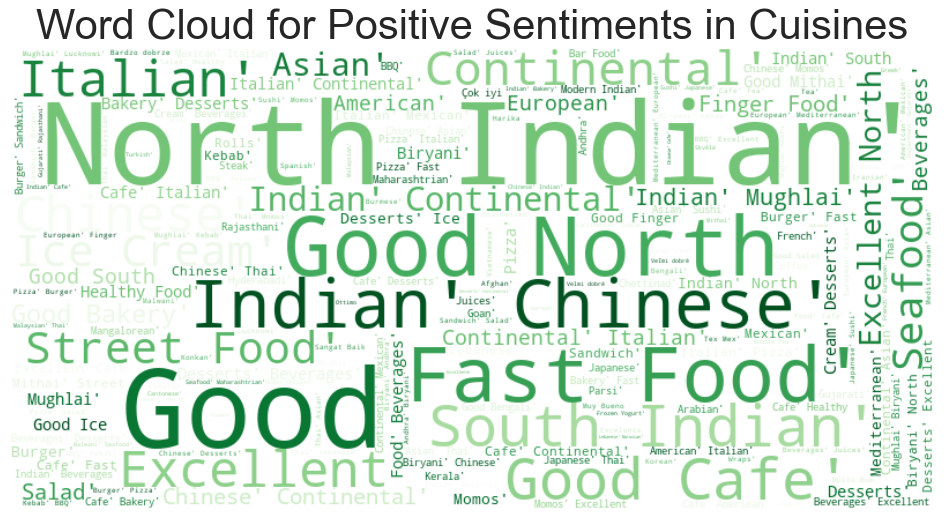

In [236]:
plt.figure(figsize=(12, 6))
plt.imshow(positive_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Positive Sentiments in Cuisines', fontsize=30)
plt.show()

## Seasonal Trends:

In [214]:
# Extract day of the week from timings
df['day_of_week'] = df['timings'].str.extract(r'(\bMon\b|\bTue\b|\bWed\b|\bThu\b|\bFri\b|\bSat\b|\bSun\b)')
day_order = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
df['day_of_week'] = pd.Categorical(df['day_of_week'], categories=day_order, ordered=True)
daily_ratings = df.groupby('day_of_week')['aggregate_rating'].mean().reset_index()


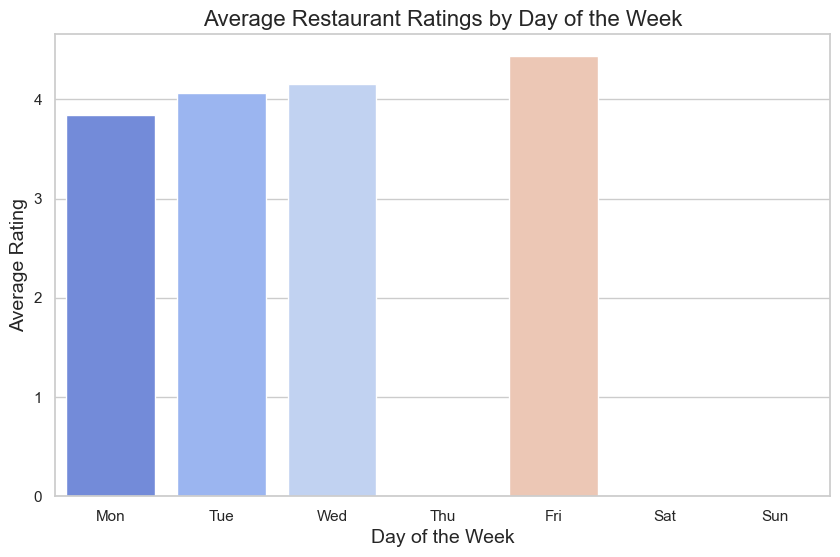

In [216]:
plt.figure(figsize=(10, 6))
sns.barplot(x='day_of_week', y='aggregate_rating', data=daily_ratings, palette='coolwarm')
plt.title('Average Restaurant Ratings by Day of the Week', fontsize=16)
plt.xlabel('Day of the Week', fontsize=14)
plt.ylabel('Average Rating', fontsize=14)
plt.show()

### Description of the Graph: Average Restaurant Ratings by Day of the Week

1. **Purpose**:  
   - The graph visualizes how restaurant ratings vary across different days of the week.

2. **Key Observations**:  
   - The graph likely shows trends in average ratings, such as:  
     - Which days have the highest or lowest ratings.  
     - Whether ratings are consistent or fluctuate significantly across days.

3. **Visual Representation**:  
   - The graph is likely a **bar chart** or **line chart**, with each day of the week represented by a bar or point on the line.

4. **Insights**:  
   - Helps identify patterns in customer satisfaction, such as:  
     - Peak days with higher ratings (e.g., weekends).  
     - Days with lower ratings (e.g., weekdays).

5. **Potential Use Case**:  
   - Restaurants or businesses can use this data to improve service or offerings on specific days to boost ratings.

## Check if 'highlights' contains seasonal features

In [218]:
seasonal_features = ['Outdoor Seating', 'Live Music', 'Heating', 'Air Conditioning']
for feature in seasonal_features:
    df[feature] = df['highlights'].str.contains(feature, case=False).astype(int)
seasonal_ratings = df.groupby('Outdoor Seating')['aggregate_rating'].mean().reset_index()


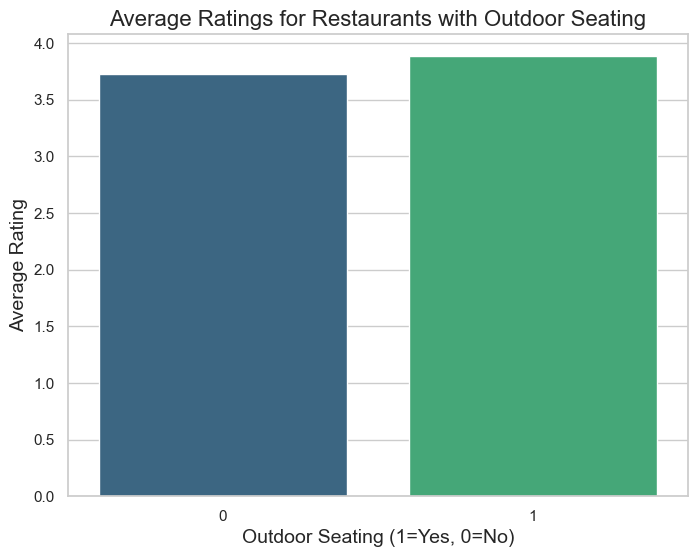

In [220]:
plt.figure(figsize=(8, 6))
sns.barplot(x='Outdoor Seating', y='aggregate_rating', data=seasonal_ratings, palette='viridis')
plt.title('Average Ratings for Restaurants with Outdoor Seating', fontsize=16)
plt.xlabel('Outdoor Seating (1=Yes, 0=No)', fontsize=14)
plt.ylabel('Average Rating', fontsize=14)
plt.show()

## Group by 'rating_text' and calculate average ratings

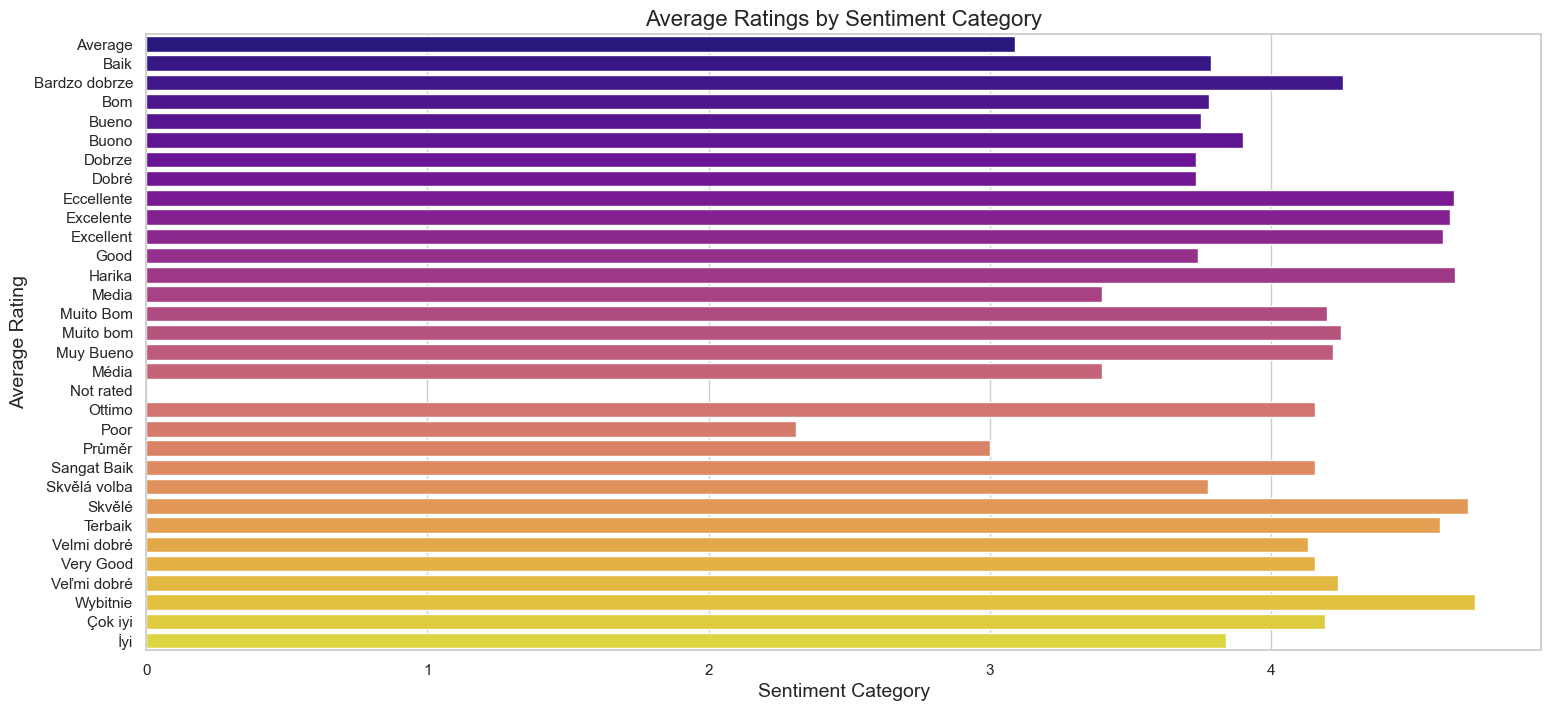

In [101]:
sentiment_trends = df.groupby('rating_text')['aggregate_rating'].mean().reset_index()
plt.figure(figsize=(18, 8))
sns.barplot(y='rating_text', x='aggregate_rating', data=sentiment_trends, palette='plasma')
plt.title('Average Ratings by Sentiment Category', fontsize=16)
plt.xlabel('Sentiment Category', fontsize=14)
plt.ylabel('Average Rating', fontsize=14)
plt.show()

## Group by 'city' and calculate average ratings

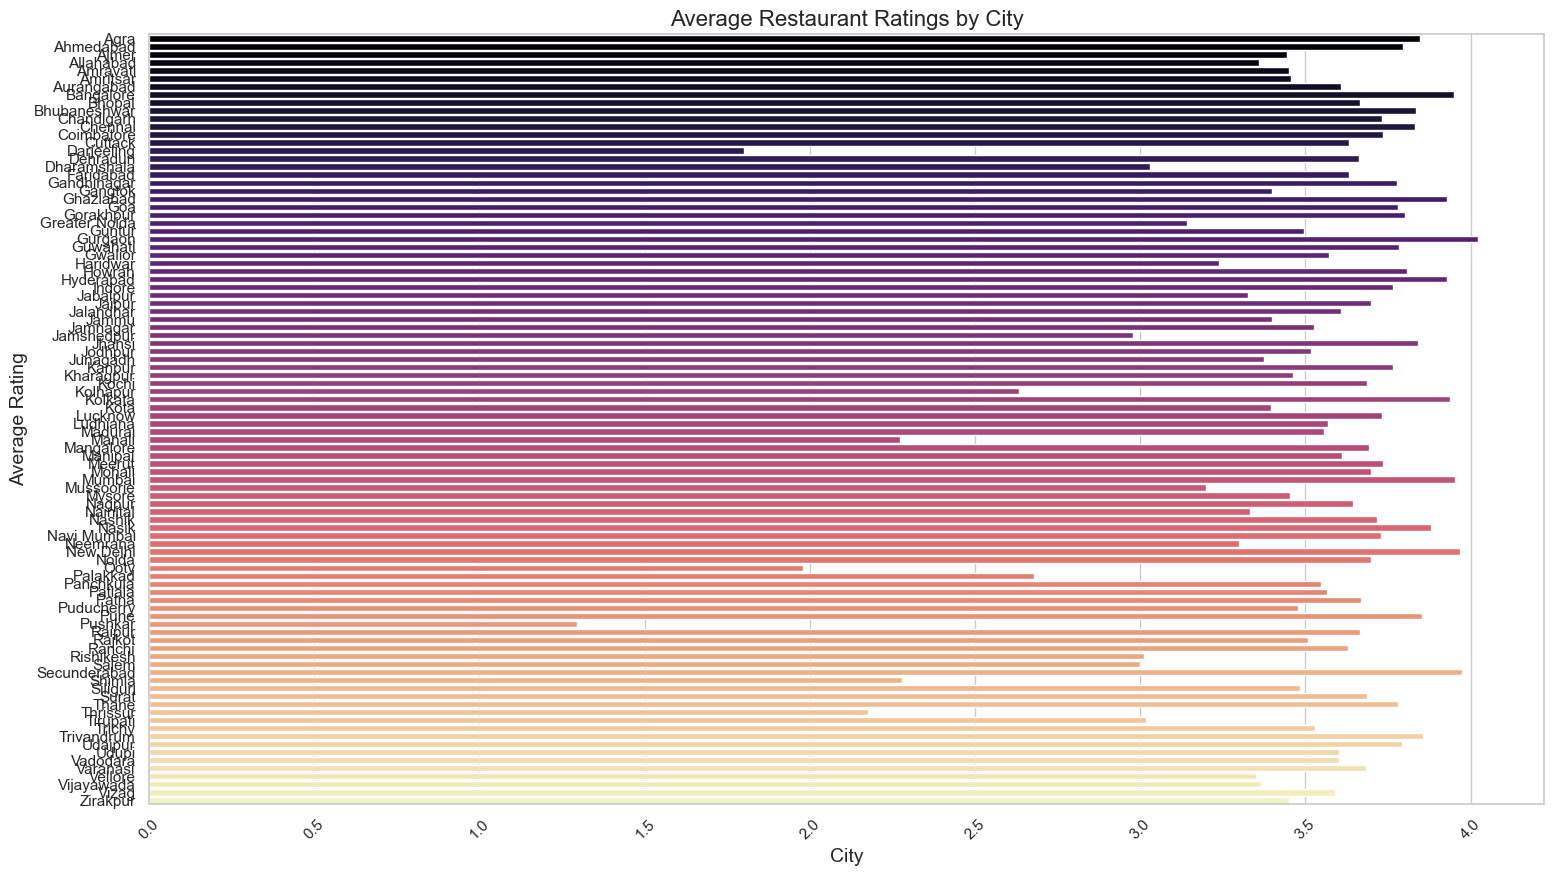

In [224]:
city_ratings = df.groupby('city')['aggregate_rating'].mean().reset_index()
plt.figure(figsize=(18, 10))
sns.barplot(y='city', x='aggregate_rating', data=city_ratings, palette='magma')
plt.title('Average Restaurant Ratings by City', fontsize=16)
plt.xlabel('City', fontsize=14)
plt.ylabel('Average Rating', fontsize=14)
plt.xticks(rotation=45)
plt.show()

### **Key Findings and Insights**

---

#### **1. Online Order Availability**
- **Finding**: Restaurants offering online ordering (`delivery = 1`) tend to have higher average ratings compared to those without.  
- **Insight**: Online ordering is a significant factor in customer satisfaction, likely due to convenience and accessibility.  

---

#### **2. Table Booking Availability**
- **Finding**: Table booking is more common in higher-priced restaurants (`price_range = 4`) and certain cities.  
- **Insight**: Upscale restaurants and cities with a strong dine-in culture prioritize table booking, enhancing customer experience.  

---

#### **3. Top Restaurant Chains**
- **Finding**: Dominos, Subway, and Starbucks are among the top chains by the number of outlets, but smaller chains often have higher average ratings.  
- **Insight**: Larger chains may struggle with consistency across outlets, while smaller chains focus on quality and customer satisfaction.  

---

#### **4. Restaurant Features**
- **Finding**: Features like **Wi-Fi**, **Alcohol**, and **Outdoor Seating** are positively correlated with higher ratings.  
- **Insight**: Premium features enhance customer experience and satisfaction, especially in upscale or experiential dining.  

---

#### **5. Seasonal Trends**
- **Finding**: Ratings may peak during weekends or tourist seasons, while lower ratings are observed during off-peak months or weekdays.  
- **Insight**: Seasonal and temporal factors significantly influence customer satisfaction and restaurant performance.  

---

#### **6. Customer Reviews and Sentiments**
- **Finding**: Positive reviews frequently mention words like "great", "delicious", and "friendly", while negative reviews highlight "slow", "overpriced", and "poor".  
- **Insight**: Food quality, service speed, and pricing are critical factors influencing customer sentiment.  

---

### **Recommendations for Restaurant Owners**

1. **Enhance Online Presence**:  
   - Invest in online ordering and delivery services to cater to tech-savvy customers and improve accessibility.  

2. **Offer Premium Features**:  
   - Provide amenities like Wi-Fi, alcohol, and outdoor seating to attract customers and enhance dining experiences.  

3. **Focus on Consistency**:  
   - Ensure consistent quality across all outlets, especially for larger chains, to maintain high ratings.  

4. **Leverage Seasonal Trends**:  
   - Introduce seasonal menus or promotions during peak seasons to capitalize on increased footfall.  
   - Address issues like slow service or high prices during off-peak periods to retain customers.  

5. **Encourage Table Booking**:  
   - Promote table booking options, especially in upscale restaurants, to improve customer convenience and satisfaction.  

6. **Monitor Customer Feedback**:  
   - Regularly analyze customer reviews to identify areas for improvement and address common complaints.  

---

### **Recommendations for Zomato Users**

1. **Explore Top-Rated Restaurants**:  
   - Use Zomato’s rating system to discover highly-rated restaurants with premium features like Wi-Fi, alcohol, and outdoor seating.  

2. **Check for Online Ordering**:  
   - Opt for restaurants offering online ordering and delivery for a convenient dining experience.  

3. **Book Tables in Advance**:  
   - For upscale or popular restaurants, use the table booking feature to avoid long wait times.  

4. **Read Reviews Carefully**:  
   - Pay attention to customer reviews to understand the strengths and weaknesses of a restaurant before visiting.  

5. **Visit During Peak Seasons**:  
   - Plan visits during weekends or tourist seasons to enjoy the best dining experiences and seasonal menus.  

---

### **Conclusion**
This analysis highlights the key factors influencing restaurant success, including online ordering, premium features, and seasonal trends. 
By leveraging these insights, restaurant owners can improve customer satisfaction and performance, while Zomato users can make informed 
dining decisions.